# Logistic Regression Without Libraries

[0 0 0 1 1 1]


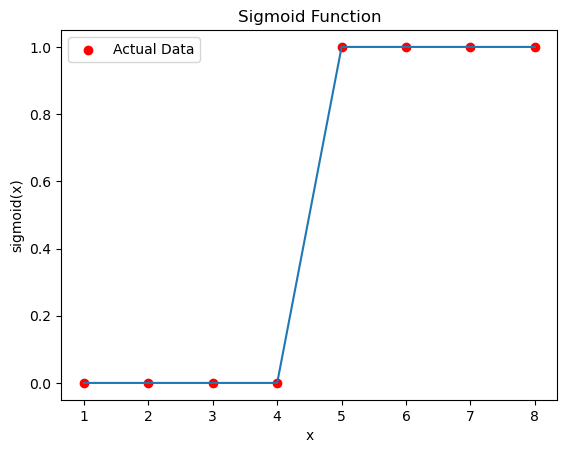

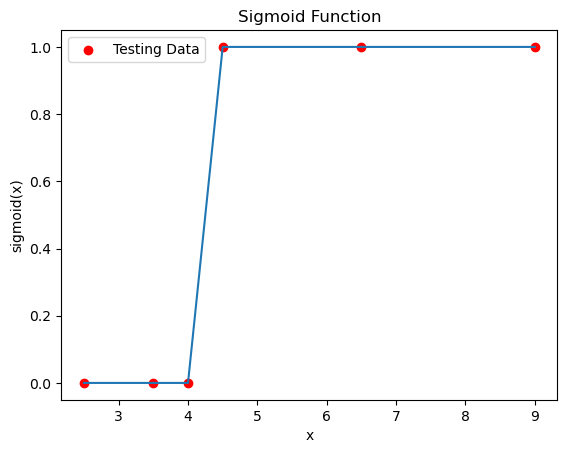

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Initialize weights and bias
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls


# Example usage:
if __name__ == "__main__":
    # Sample dataset
    X = np.array([[1],[2],[3],[4],[5],[6],[7],[8]])
    y = np.array([0, 0,0,0,1, 1, 1, 1])

    # Train logistic regression model
    model = LogisticRegression(learning_rate=0.1, num_iterations=1000)
    model.fit(X, y)

    # Test data
    X_test = np.array([[2.5], [3.5], [4], [4.5], [6.5],[9]])
    Y_test = np.array([0,0,1,1,1,1])

    # Predict
    y_pred = np.array(model.predict(X_test))
    print(y_pred)


    plt.scatter(X, y, label = 'Actual Data', color='Red')
    plt.plot(X,y)
    plt.xlabel('x')
    plt.ylabel('sigmoid(x)')
    plt.title('Sigmoid Function')
    plt.legend()
    plt.show()

    plt.scatter(X_test, y_pred, label='Testing Data', color='Red')
    plt.plot(X_test, y_pred)
    plt.xlabel('x')
    plt.ylabel('sigmoid(x)')
    plt.title('Sigmoid Function')
    plt.legend()
    plt.show()

# Implement all the performance matrix

In [2]:
import numpy as np

def confusion_matrix(y_true, y_pred):
    true_positive = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    false_positive = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    true_negative = np.sum(np.logical_and(y_true == 0, y_pred == 0))
    false_negative = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    return true_positive, false_positive, true_negative, false_negative

def precision(true_positive, false_positive):
    return true_positive / (true_positive + false_positive)

def recall(true_positive, false_negative):
    return true_positive / (true_positive + false_negative)

def g_mean(true_positive, false_positive, true_negative, false_negative):
    sensitivity = recall(true_positive, false_negative)
    specificity = true_negative / (true_negative + false_positive)
    return np.sqrt(sensitivity * specificity)

def f_measure(precision, recall):
    return 2 * ((precision * recall) / (precision + recall))

def tpr(true_positive, false_negative):
    return recall(true_positive, false_negative)

def far(false_positive, true_negative):
    return false_positive / (false_positive + true_negative)

def accuracy(true_positive, false_positive, true_negative, false_negative):
    return (true_positive + true_negative) / (true_positive + false_positive + true_negative + false_negative)

# Example usage
if __name__ == "__main__":
    # Example binary classification results


    # Calculate confusion matrix
    tp, fp, tn, fn = confusion_matrix(Y_test, y_pred)

    # Calculate performance metrics
    prec = precision(tp, fp)
    rec = recall(tp, fn)
    gmean = g_mean(tp, fp, tn, fn)
    f_measure = f_measure(prec, rec)
    tpr_val = tpr(tp, fn)
    far_val = far(fp, tn)
    acc = accuracy(tp, fp, tn, fn)

    print("Confusion Matrix:")
    print("True Positive:", tp)
    print("False Positive:", fp)
    print("True Negative:", tn)
    print("False Negative:", fn)

    print("\nPerformance Metrics:")
    print("Precision:", prec)
    print("Recall:", rec)
    print("G-Mean:", gmean)
    print("F-Measure:", f_measure)
    print("True Positive Rate (TPR):", tpr_val)
    print("False Alarm Rate (FAR):", far_val)
    print("Accuracy:", acc)


Confusion Matrix:
True Positive: 3
False Positive: 0
True Negative: 2
False Negative: 1

Performance Metrics:
Precision: 1.0
Recall: 0.75
G-Mean: 0.8660254037844386
F-Measure: 0.8571428571428571
True Positive Rate (TPR): 0.75
False Alarm Rate (FAR): 0.0
Accuracy: 0.8333333333333334


In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_pred = linear_reg.predict(X_test)
linear_reg_r2 = r2_score(y_test, linear_reg_pred)

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
ridge_reg_pred = ridge_reg.predict(X_test)
ridge_reg_r2 = r2_score(y_test, ridge_reg_pred)

# Lasso Regression
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)
lasso_reg_pred = lasso_reg.predict(X_test)
lasso_reg_r2 = r2_score(y_test, lasso_reg_pred)

# Elastic Net Regression
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
elastic_net_pred = elastic_net.predict(X_test)
elastic_net_r2 = r2_score(y_test, elastic_net_pred)

# Print R2 scores for comparison
print("Linear Regression R2 Score:", linear_reg_r2)
print("Ridge Regression R2 Score:", ridge_reg_r2)
print("Lasso Regression R2 Score:", lasso_reg_r2)
print("Elastic Net Regression R2 Score:", elastic_net_r2)


Linear Regression R2 Score: 0.9468960016420045
Ridge Regression R2 Score: 0.9440579987200235
Lasso Regression R2 Score: 0.40397020062894673
Elastic Net Regression R2 Score: 0.7167562035916235
